# Сверточная нейронная сеть

Имя, Фамилия: Гурулева Наталья

---

В этом задании вы научитесь работать с изображениями, а также построите сверточную нейронную сеть и сравните ее с полносвязной сетью из предыдущего домашнего задания.




In [1]:
import torch
from torch import nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import scipy

import cv2

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

from tqdm.auto import trange

# Задание 1: Работа с изображениями (1 балл)

Загрузите изображение `lena.png` в переменную `lena`. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате `BGR`.

In [2]:
!wget -O lena.png https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/viz/lena.png

--2025-02-23 19:33:58--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/viz/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 488594 (477K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 477.14K  2.63MB/s    in 0.2s    

2025-02-23 19:33:59 (2.63 MB/s) - ‘lena.png’ saved [488594/488594]



In [3]:
# YOUR CODE

In [4]:
lena = cv2.imread('lena.png')

array([[[130, 158, 223],
        [129, 157, 222],
        [129, 157, 222],
        ...,
        [120, 176, 235],
        [ 89, 148, 204],
        [ 47, 107, 161]],

       [[131, 159, 224],
        [130, 158, 223],
        [130, 158, 223],
        ...,
        [124, 179, 236],
        [101, 157, 212],
        [ 64, 121, 173]],

       [[130, 159, 226],
        [130, 159, 226],
        [129, 158, 225],
        ...,
        [126, 176, 229],
        [103, 153, 205],
        [ 69, 120, 170]],

       ...,

       [[  6,  14,  21],
        [  7,  15,  22],
        [  9,  17,  24],
        ...,
        [ 52,  68, 144],
        [ 52,  67, 146],
        [ 53,  67, 150]],

       [[  7,  15,  22],
        [  8,  16,  23],
        [ 10,  18,  25],
        ...,
        [ 56,  72, 149],
        [ 58,  72, 155],
        [ 58,  73, 159]],

       [[  9,  17,  24],
        [ 11,  19,  26],
        [ 13,  21,  28],
        ...,
        [ 59,  75, 152],
        [ 60,  75, 161],
        [ 64,  78, 166]]], dtype=uint8)
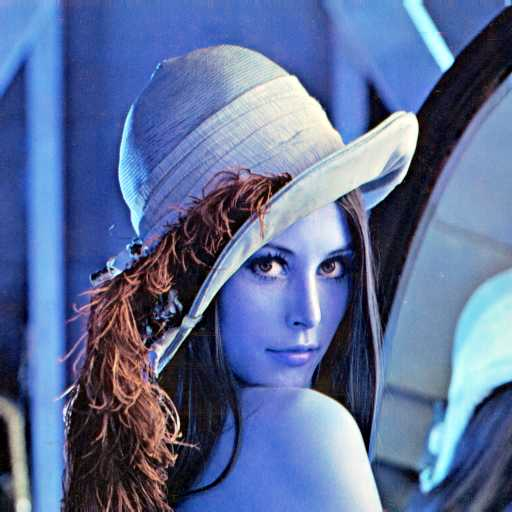

In [5]:
lena

## 1.1 Перевод в RGB

Переведите изображение `lena` в RGB несколькими способами:

*   c помощью функций split & merge;
*   с помощью индексации в numpy;
*   с помощью cvtColor.


In [6]:
arrays = cv2.split(lena)

array([[[223, 158, 130],
        [222, 157, 129],
        [222, 157, 129],
        ...,
        [235, 176, 120],
        [204, 148,  89],
        [161, 107,  47]],

       [[224, 159, 131],
        [223, 158, 130],
        [223, 158, 130],
        ...,
        [236, 179, 124],
        [212, 157, 101],
        [173, 121,  64]],

       [[226, 159, 130],
        [226, 159, 130],
        [225, 158, 129],
        ...,
        [229, 176, 126],
        [205, 153, 103],
        [170, 120,  69]],

       ...,

       [[ 21,  14,   6],
        [ 22,  15,   7],
        [ 24,  17,   9],
        ...,
        [144,  68,  52],
        [146,  67,  52],
        [150,  67,  53]],

       [[ 22,  15,   7],
        [ 23,  16,   8],
        [ 25,  18,  10],
        ...,
        [149,  72,  56],
        [155,  72,  58],
        [159,  73,  58]],

       [[ 24,  17,   9],
        [ 26,  19,  11],
        [ 28,  21,  13],
        ...,
        [152,  75,  59],
        [161,  75,  60],
        [166,  78,  64]]], dtype=uint8)
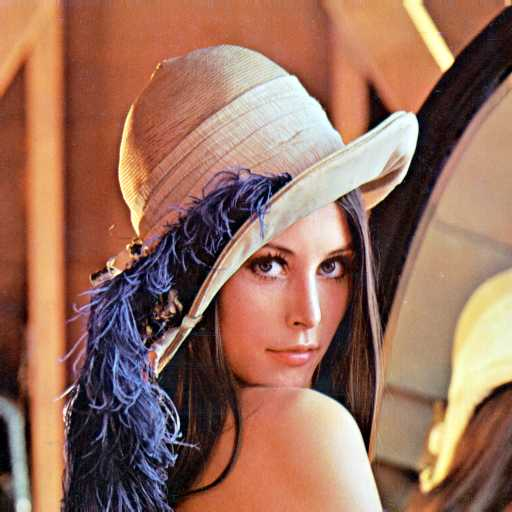

In [7]:
cv2.merge((arrays[2], arrays[1], arrays[0]))

array([[[223, 158, 130],
        [222, 157, 129],
        [222, 157, 129],
        ...,
        [235, 176, 120],
        [204, 148,  89],
        [161, 107,  47]],

       [[224, 159, 131],
        [223, 158, 130],
        [223, 158, 130],
        ...,
        [236, 179, 124],
        [212, 157, 101],
        [173, 121,  64]],

       [[226, 159, 130],
        [226, 159, 130],
        [225, 158, 129],
        ...,
        [229, 176, 126],
        [205, 153, 103],
        [170, 120,  69]],

       ...,

       [[ 21,  14,   6],
        [ 22,  15,   7],
        [ 24,  17,   9],
        ...,
        [144,  68,  52],
        [146,  67,  52],
        [150,  67,  53]],

       [[ 22,  15,   7],
        [ 23,  16,   8],
        [ 25,  18,  10],
        ...,
        [149,  72,  56],
        [155,  72,  58],
        [159,  73,  58]],

       [[ 24,  17,   9],
        [ 26,  19,  11],
        [ 28,  21,  13],
        ...,
        [152,  75,  59],
        [161,  75,  60],
        [166,  78,  64]]], dtype=uint8)
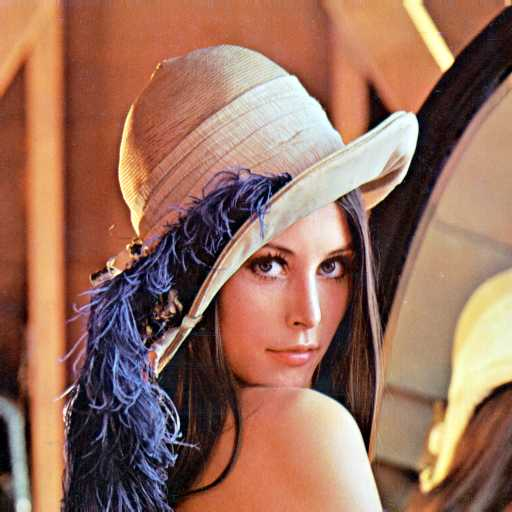

In [8]:
lena[:, :, :: -1]

In [9]:
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

array([[[223, 158, 130],
        [222, 157, 129],
        [222, 157, 129],
        ...,
        [235, 176, 120],
        [204, 148,  89],
        [161, 107,  47]],

       [[224, 159, 131],
        [223, 158, 130],
        [223, 158, 130],
        ...,
        [236, 179, 124],
        [212, 157, 101],
        [173, 121,  64]],

       [[226, 159, 130],
        [226, 159, 130],
        [225, 158, 129],
        ...,
        [229, 176, 126],
        [205, 153, 103],
        [170, 120,  69]],

       ...,

       [[ 21,  14,   6],
        [ 22,  15,   7],
        [ 24,  17,   9],
        ...,
        [144,  68,  52],
        [146,  67,  52],
        [150,  67,  53]],

       [[ 22,  15,   7],
        [ 23,  16,   8],
        [ 25,  18,  10],
        ...,
        [149,  72,  56],
        [155,  72,  58],
        [159,  73,  58]],

       [[ 24,  17,   9],
        [ 26,  19,  11],
        [ 28,  21,  13],
        ...,
        [152,  75,  59],
        [161,  75,  60],
        [166,  78,  64]]], dtype=uint8)
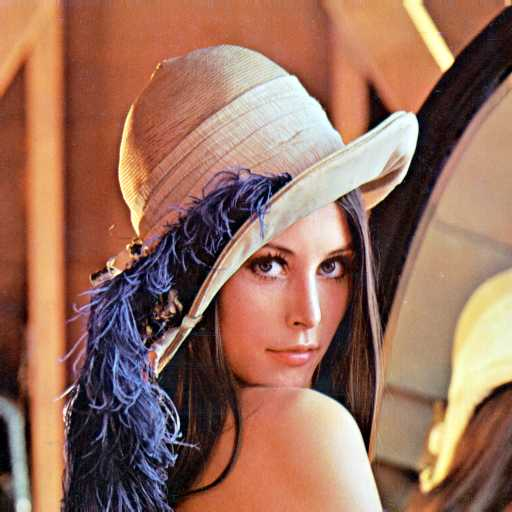

In [10]:
lena

## 1.2 Перестановка

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения `lena` и отобразите результат на экран.

In [11]:
left = np.concatenate((lena[256:, 256:, :], lena[256:, :256, :]))

In [12]:
right = np.concatenate((lena[:256, 256:, :], lena[:256, :256, :]))

array([[[149,  67,  43],
        [149,  75,  50],
        [147,  75,  50],
        ...,
        [235, 176, 120],
        [204, 148,  89],
        [161, 107,  47]],

       [[107,  41,  17],
        [105,  51,  25],
        [108,  54,  28],
        ...,
        [236, 179, 124],
        [212, 157, 101],
        [173, 121,  64]],

       [[ 71,  13,   0],
        [ 72,  21,   0],
        [ 77,  26,   5],
        ...,
        [229, 176, 126],
        [205, 153, 103],
        [170, 120,  69]],

       ...,

       [[ 21,  14,   6],
        [ 22,  15,   7],
        [ 24,  17,   9],
        ...,
        [183, 140, 106],
        [165,  91,  64],
        [164,  72,  49]],

       [[ 22,  15,   7],
        [ 23,  16,   8],
        [ 25,  18,  10],
        ...,
        [145,  93,  56],
        [156,  69,  39],
        [169,  60,  37]],

       [[ 24,  17,   9],
        [ 26,  19,  11],
        [ 28,  21,  13],
        ...,
        [126,  62,  27],
        [164,  69,  41],
        [178,  68,  45]]], dtype=uint8)
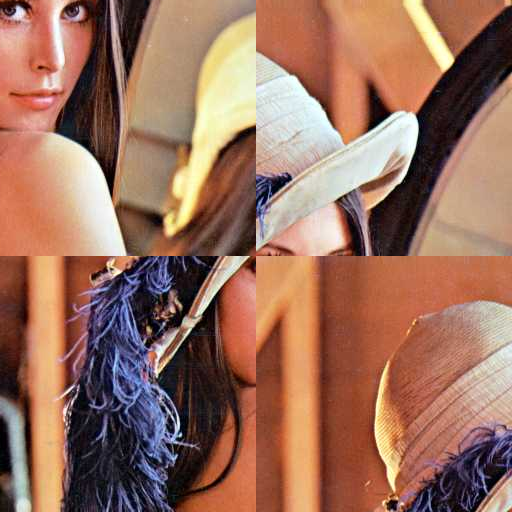

In [13]:
np.concatenate((left, right), axis=1)

## 1.3 Оттенки серого

Усредните значения всех трех цветовых каналов `lena` в каждый из каналов итогового изображения `lena_gray_my`. Переведите исходное цветное изображение `lena` в изображение в градациях серого с помощью функции `cvtColor`. (`lena_gray_cvt`). Вычислите модуль разности между изображениями `lena_gray_my` и `lena_gray_cvt` и отобразите ее на экране.


In [14]:
lena_gray_my = lena.mean(axis=2).astype(np.uint8)

array([[170, 169, 169, ..., 177, 147, 105],
       [171, 170, 170, ..., 179, 156, 119],
       [171, 171, 170, ..., 177, 153, 119],
       ...,
       [ 13,  14,  16, ...,  88,  88,  90],
       [ 14,  15,  17, ...,  92,  95,  96],
       [ 16,  18,  20, ...,  95,  98, 102]], dtype=uint8)
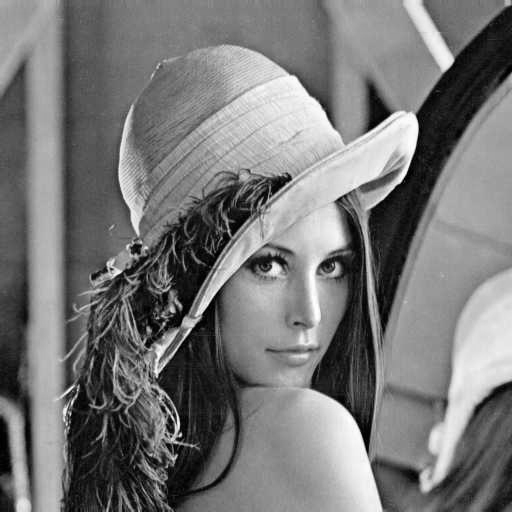

In [15]:
lena_gray_my

In [16]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

array([[174, 173, 173, ..., 187, 158, 116],
       [175, 174, 174, ..., 190, 167, 130],
       [176, 176, 175, ..., 186, 163, 129],
       ...,
       [ 15,  16,  18, ...,  89,  89,  90],
       [ 16,  17,  19, ...,  93,  95,  97],
       [ 18,  20,  22, ...,  96,  99, 103]], dtype=uint8)
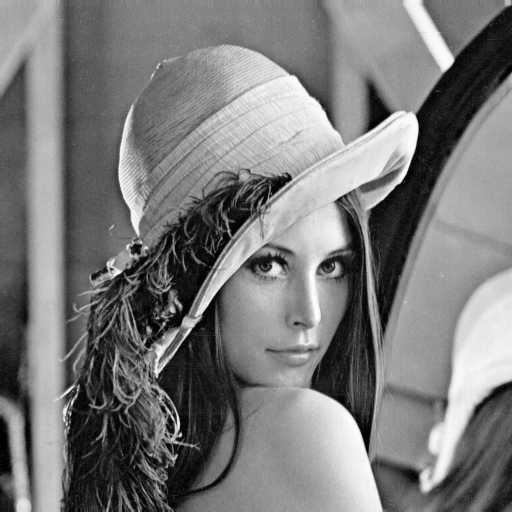

In [17]:
lena_gray_cvt

array([[252, 252, 252, ..., 246, 245, 245],
       [252, 252, 252, ..., 245, 245, 245],
       [251, 251, 251, ..., 247, 246, 246],
       ...,
       [254, 254, 254, ..., 255, 255,   0],
       [254, 254, 254, ..., 255,   0, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8)
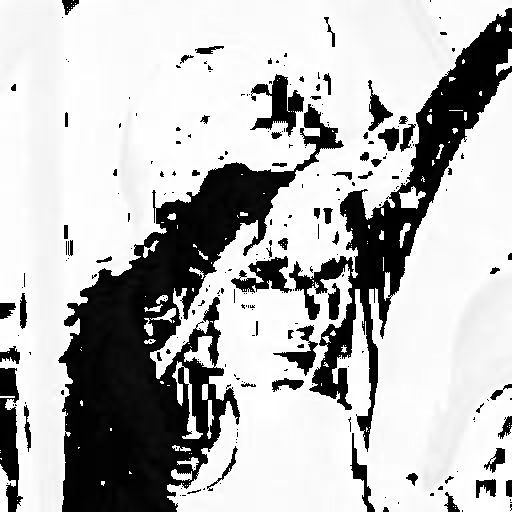

In [ ]:
np.absolute(lena_gray_my - lena_gray_cvt)

## 1.4 Координата яркости

Переведите изображение `lena` в одно из цветовых пространств (`cvtColor`) с выделенной координатой яркости (`HSV`, `HSL`, `HSB`, `CIE Lab`), инвертируйте яркостную составляющую, переведите обратно в `RGB`. Отобразите результат.

In [18]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)

In [19]:
h, s, v = cv2.split(lena_hsv)

In [20]:
lena_hsv_inverted = cv2.merge((h, s, 255 - v))

array([[[  9, 106,  32],
        [  9, 107,  33],
        [  9, 107,  33],
        ...,
        [ 15, 125,  20],
        [ 15, 144,  51],
        [ 16, 181,  94]],

       [[  9, 106,  31],
        [  9, 106,  32],
        [  9, 106,  32],
        ...,
        [ 15, 121,  19],
        [ 15, 134,  43],
        [ 16, 161,  82]],

       [[  9, 108,  29],
        [  9, 108,  29],
        [  9, 109,  30],
        ...,
        [ 15, 115,  26],
        [ 15, 127,  50],
        [ 15, 152,  85]],

       ...,

       [[ 16, 182, 234],
        [ 16, 174, 233],
        [ 16, 159, 231],
        ...,
        [  5, 163, 111],
        [  5, 164, 109],
        [  4, 165, 105]],

       [[ 16, 174, 233],
        [ 16, 166, 232],
        [ 16, 153, 230],
        ...,
        [  5, 159, 106],
        [  4, 160, 100],
        [  4, 162,  96]],

       [[ 16, 159, 231],
        [ 16, 147, 229],
        [ 16, 137, 227],
        ...,
        [  5, 156, 103],
        [  4, 160,  94],
        [  4, 157,  89]]], dtype=uint8)
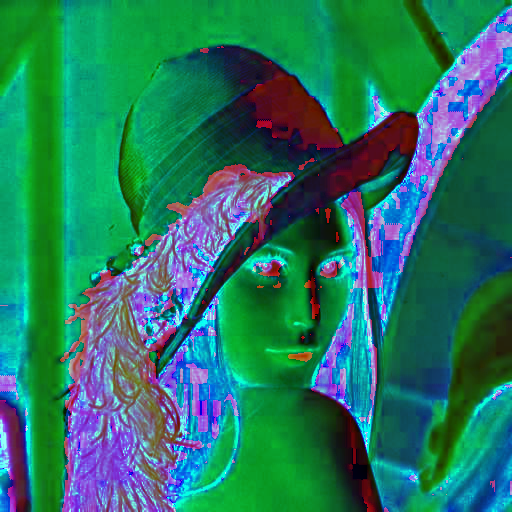

In [21]:
lena_hsv_inverted

In [22]:
cv2.cvtColor(lena_hsv_inverted, cv2.COLOR_HSV2RGB)

array([[[ 32,  22,  18],
        [ 33,  23,  19],
        [ 33,  23,  19],
        ...,
        [ 20,  15,  10],
        [ 51,  36,  22],
        [ 94,  62,  27]],

       [[ 31,  21,  18],
        [ 32,  22,  18],
        [ 32,  22,  18],
        ...,
        [ 19,  14,   9],
        [ 43,  31,  20],
        [ 82,  57,  30]],

       [[ 29,  20,  16],
        [ 29,  20,  16],
        [ 30,  21,  17],
        ...,
        [ 26,  20,  14],
        [ 50,  37,  25],
        [ 85,  59,  34]],

       ...,

       [[234, 156,  66],
        [233, 158,  74],
        [231, 163,  86],
        ...,
        [111,  51,  40],
        [109,  50,  38],
        [105,  46,  37]],

       [[233, 158,  74],
        [232, 161,  80],
        [230, 165,  92],
        ...,
        [106,  50,  39],
        [100,  45,  37],
        [ 96,  43,  35]],

       [[231, 163,  86],
        [229, 167,  96],
        [227, 170, 105],
        ...,
        [103,  50,  39],
        [ 94,  42,  35],
        [ 89,  41,  34]]], dtype=uint8)

# Задание 2: Одномерная свертка (2 балла)

Начнем с одномерных сигналов — например, это могут быть различные временные ряды.

## 1.1 Реализация

Реализуйте функцию, вычисляющую одномерную свертку.


In [23]:
def t_convolve(signal: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Вычисляет свертку сигнала с ядром без отступов.

    Эта функция реализует дискретную свертку одномерного сигнала с ядром.
    Важно отметить, что ядро переворачивается перед выполнением свертки,
    что соответствует математическому определению свертки. Результатом
    является сигнал меньшего размера, чем входной сигнал, так как отступы
    не используются.

    Args:
        signal (np.ndarray): Входной сигнал.
        kernel (np.ndarray): Ядро свертки.

    Returns:
        np.ndarray: Свернутый сигнал.
                    Размерность выходного сигнала равна len(signal) - len(kernel) + 1.
    """
    kernel = kernel[::-1]
    if len(signal) - len(kernel) >= 0 and kernel.ndim == 1 and signal.ndim == 1:
        size = len(kernel)
        res = []
        for i in range(len(signal) - size + 1):
            res.append(np.dot(signal[i : i + size], kernel))
        return np.array(res)

Проверьте правильность реализации, сравнив с реализацией из `scipy.signal.convolve` (используйте `numpy.testing.assert_allclose`)

In [24]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
kernel = np.array([1, 0, 1])
np.testing.assert_allclose(scipy.signal.convolve(x, kernel, mode='valid'), t_convolve(x, kernel))

## 1.2 Удаление шума

Посмотрим, как операция свертки может помочь нам убрать шум из сигнала.

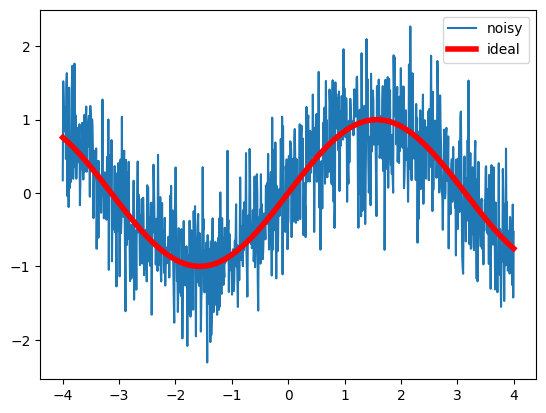

In [25]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.legend(loc=0)
plt.show()

Для подавления шума можно использовать усреднение значений сигнала в окрестности каждой точки (см. [ЗБЧ](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB)). Вы можете убедиться, что такая операция может быть реализована при помощи свертки данных с ядром, $[\frac 1w, \frac 1w, ..., \frac 1w]$, где $w$ — размер окна.

Вычислите свертку <b>зашумленного</b> сигнала с ядром $[0.2, 0.2, 0.2, 0.2, 0.2]$ </i>

In [26]:
kernel = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
signal_convolved = t_convolve(noisy_signal, kernel)

Отобразите на одном графике сигнал, зашумленную и восстановленные версии.

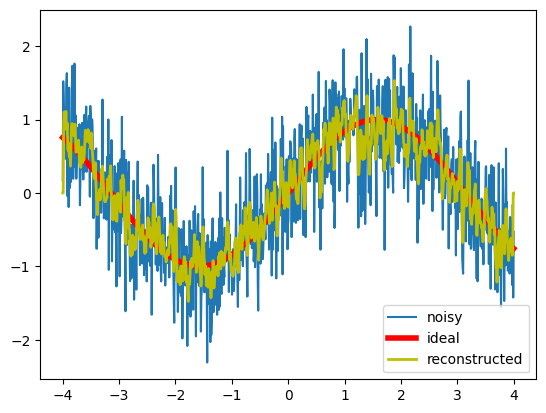

In [27]:
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x, np.pad(signal_convolved, (2,2), constant_values=0), 'y', label='reconstructed', linewidth=2)
plt.legend(loc=0)
plt.show()

Попробуйте подобрать такую ширину окна, чтобы востановленный сигнал был наиболее похож на исходный.

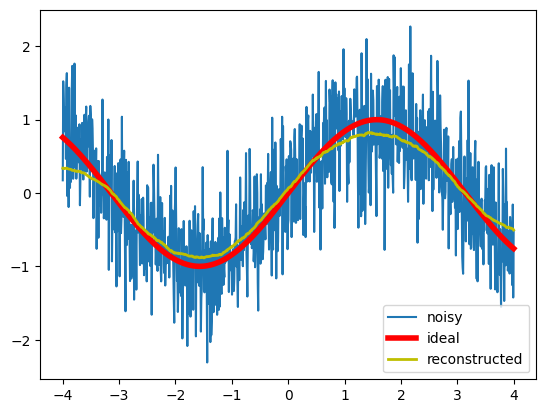

In [28]:
w = 199
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x, t_convolve(np.pad(noisy_signal, (w // 2, w // 2), mode='edge'), np.ones(w) / w), 'y', label='reconstructed', linewidth=2)
plt.legend(loc=0)
plt.show()

# Задание 3: Пулинг (1 балл)

При использовании сверточных слоев принято использовать слои пулинга. Эта операция позволяет уменьшить пространственные размерности изображения и избавиться от избыточности.

## 3.1 Реализация

Реализуйте операции пулинга для цветных изображений.

In [29]:
def pooling(image: np.ndarray, w: int, func: Callable = np.max):
    """
    Применяет операцию пулинга к изображению.

    Args:
        image (np.ndarray): Входное изображение в формате (высота, ширина, каналы).
        w (int): Размер окна пулинга (w x w).
        func (Callable): Функция, используемая для агрегирования значений в окне пулинга.
                         Должна принимать массив и axis=(0, 1) и возвращать одно значение для каждого канала.
                         По умолчанию np.max (максимальный пулинг).

    Returns:
        np.ndarray: Изображение после пулинга с размерами (высота//w, ширина//w, каналы).
    """
    assert(image.ndim == 3)
    height, width, channels = image.shape
    image = image[: height - (height % w), : width - (width % w), :]
    image = func(image.reshape((height // w, w, width // w, w, channels)), axis=(1, 3))
    return image

def maxpool(image: np.ndarray, w: int) -> None:
    """
    Применяет операцию максимального пулинга к изображению.

    Args:
        image (np.ndarray): Входное изображение в формате (высота, ширина, каналы).
        w (int): Размер окна пулинга (w x w).
    """
    assert(image.ndim == 3)
    return pooling(image, w)

def medianpool(image: np.ndarray, w: int) -> None:
    """
    Применяет операцию медианного пулинга к изображению.

    Args:
        image (np.ndarray): Входное изображение в формате (высота, ширина, каналы).
        w (int): Размер окна пулинга (w x w).
    """
    assert(image.ndim == 3)
    return pooling(image, w, func=np.median).astype(np.uint8)

array([[[224, 159, 131],
        [223, 158, 130],
        [221, 156, 126],
        ...,
        [250, 179, 135],
        [236, 179, 124],
        [212, 157, 101]],

       [[227, 160, 131],
        [226, 159, 130],
        [224, 158, 128],
        ...,
        [238, 173, 138],
        [231, 176, 137],
        [205, 153, 110]],

       [[226, 160, 128],
        [225, 159, 127],
        [223, 157, 123],
        ...,
        [223, 168, 138],
        [220, 169, 138],
        [185, 142, 108]],

       ...,

       [[ 29,  22,  14],
        [ 33,  26,  18],
        [ 34,  27,  21],
        ...,
        [117,  64,  48],
        [130,  65,  52],
        [135,  61,  49]],

       [[ 24,  17,   9],
        [ 27,  20,  12],
        [ 28,  21,  15],
        ...,
        [131,  72,  56],
        [144,  70,  55],
        [150,  67,  53]],

       [[ 26,  19,  11],
        [ 29,  22,  14],
        [ 30,  23,  17],
        ...,
        [140,  77,  61],
        [152,  75,  59],
        [166,  78,  64]]], dtype=uint8)
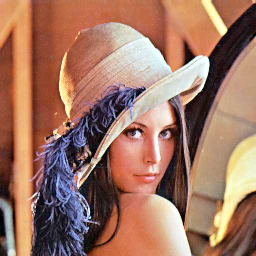

In [30]:
maxpool(lena, 2)

array([[[223, 158, 130],
        [222, 157, 128],
        [220, 155, 125],
        ...,
        [238, 170, 124],
        [235, 174, 120],
        [188, 134,  76]],

       [[226, 159, 130],
        [225, 158, 129],
        [224, 157, 125],
        ...,
        [235, 171, 134],
        [229, 175, 130],
        [184, 136,  90]],

       [[225, 158, 125],
        [224, 157, 123],
        [223, 156, 121],
        ...,
        [211, 152, 128],
        [194, 148, 120],
        [141, 102,  73]],

       ...,

       [[ 27,  20,  12],
        [ 31,  24,  16],
        [ 32,  25,  19],
        ...,
        [103,  55,  40],
        [123,  59,  46],
        [130,  60,  48]],

       [[ 22,  15,   7],
        [ 26,  19,  11],
        [ 27,  20,  14],
        ...,
        [122,  68,  52],
        [138,  68,  52],
        [144,  65,  51]],

       [[ 23,  16,   8],
        [ 27,  20,  12],
        [ 29,  22,  16],
        ...,
        [134,  75,  58],
        [147,  73,  58],
        [160,  74,  59]]], dtype=uint8)
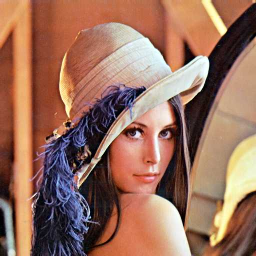

In [31]:
medianpool(lena, 2)

## 3.2 Применение

Добавить к изображению `lena.png` [шум соль и перец](https://ru.wikipedia.org/wiki/Salt_and_pepper). Примените медианный пулинг и максимальный пулинг.

Сделайте выводы о том, какой тип пулинга лучше справился с поставленной задачей, и почему.

In [32]:
lena_salt_pepper = lena.copy()

In [33]:
for _ in range(5000):
    i = np.random.choice(np.arange(len(lena)), size=1)
    j = np.random.choice(np.arange(len(lena)), size=1)
    lena_salt_pepper[i, j, :] = 0

In [34]:
for _ in range(5000):
    i = np.random.choice(np.arange(len(lena)), size=1)
    j = np.random.choice(np.arange(len(lena)), size=1)
    lena_salt_pepper[i, j, :] = 255

In [35]:
lena_salt_pepper

array([[[223, 158, 130],
        [222, 157, 129],
        [222, 157, 129],
        ...,
        [235, 176, 120],
        [204, 148,  89],
        [161, 107,  47]],

       [[224, 159, 131],
        [223, 158, 130],
        [223, 158, 130],
        ...,
        [236, 179, 124],
        [212, 157, 101],
        [173, 121,  64]],

       [[226, 159, 130],
        [226, 159, 130],
        [225, 158, 129],
        ...,
        [229, 176, 126],
        [205, 153, 103],
        [170, 120,  69]],

       ...,

       [[ 21,  14,   6],
        [ 22,  15,   7],
        [ 24,  17,   9],
        ...,
        [144,  68,  52],
        [146,  67,  52],
        [150,  67,  53]],

       [[ 22,  15,   7],
        [ 23,  16,   8],
        [ 25,  18,  10],
        ...,
        [149,  72,  56],
        [155,  72,  58],
        [159,  73,  58]],

       [[ 24,  17,   9],
        [ 26,  19,  11],
        [ 28,  21,  13],
        ...,
        [152,  75,  59],
        [161,  75,  60],
        [166,  78,  64]]], dtype=uint8)

array([[[227, 160, 131],
        [224, 158, 128],
        [223, 159, 124],
        ...,
        [175, 102,  76],
        [250, 179, 138],
        [236, 179, 137]],

       [[226, 160, 128],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [184, 111,  94],
        [223, 168, 138],
        [220, 169, 138]],

       [[224, 152, 111],
        [223, 151, 110],
        [224, 153, 106],
        ...,
        [180, 109,  89],
        [255, 255, 255],
        [ 37,  19,  28]],

       ...,

       [[255, 255, 255],
        [ 39,  32,  27],
        [ 49,  40,  43],
        ...,
        [ 50,  36,  23],
        [ 57,  30,  19],
        [118,  68,  59]],

       [[ 33,  26,  18],
        [ 34,  27,  22],
        [255, 255, 255],
        ...,
        [ 62,  44,  30],
        [117,  64,  48],
        [255, 255, 255]],

       [[255, 255, 255],
        [ 30,  23,  18],
        [ 42,  34,  32],
        ...,
        [ 88,  61,  44],
        [255, 255, 255],
        [166,  78,  64]]], dtype=uint8)
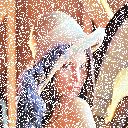

In [36]:
maxpool(lena_salt_pepper, 4)

In [37]:
medianpool(lena_salt_pepper, 4)

array([[[224, 158, 130],
        [221, 156, 123],
        [221, 156, 120],
        ...,
        [171, 100,  71],
        [228, 157, 121],
        [219, 164, 114]],

       [[223, 155, 120],
        [221, 154, 116],
        [221, 154, 111],
        ...,
        [176, 102,  79],
        [184, 119,  99],
        [105,  67,  48]],

       [[223, 151, 108],
        [220, 149, 102],
        [223, 152, 101],
        ...,
        [139,  82,  66],
        [ 49,  19,  14],
        [ 26,  12,  17]],

       ...,

       [[ 34,  27,  19],
        [ 32,  25,  20],
        [ 45,  36,  36],
        ...,
        [ 44,  30,  17],
        [ 44,  23,  12],
        [ 63,  23,  15]],

       [[ 28,  21,  13],
        [ 31,  23,  19],
        [ 39,  31,  29],
        ...,
        [ 47,  30,  16],
        [ 68,  36,  21],
        [116,  56,  44]],

       [[ 24,  17,   9],
        [ 27,  19,  15],
        [ 32,  23,  23],
        ...,
        [ 60,  39,  26],
        [115,  68,  52],
        [146,  71,  55]]], dtype=uint8)

# Задание 4: Сверточная нейронная сеть (6 баллов)

Реализуйте слои для сверточной нейронной сети и постройте ее на датасете **CIFAR-10** (Canadian Institute For Advanced Research).

*Подробнее про данные можно посмотреть [тут](https://www.cs.toronto.edu/~kriz/cifar.html)*

ВАЖНО! Для получения полного балла достаточно только реализации `forward` методов.

Реализация без PyTorch (наследование от класса `Module` из прошлых дз) обоих слоев даст **дополнительные 5 баллов**.

## 4.1 Сверточный слой (2 балла)

Реализуйте сверточный слой для двумерных данных:

In [80]:
class Conv2d(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, kernel_size: int, stride: int = 1, padding: int = 0):
        """
        Сверточный слой для двумерных данных.

        Args:
            in_channels (int): Количество входных каналов.
            out_channels (int): Количество выходных каналов.
            kernel_size (int): Размер ядра свертки (квадратное ядро).
            stride (int): Шаг свертки.
            padding (int): Отступ (padding) для входных данных.
        """
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

        self.bias = torch.zeros(out_channels)
        self.weight = torch.randn(out_channels, in_channels, kernel_size, kernel_size) * torch.sqrt(torch.tensor(2.0 / (in_channels * kernel_size * kernel_size)))


    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Прямой проход через сверточный слой.

        Args:
            x (np.ndarray): Входные данные (batch_size, in_channels, height, width).

        Returns:
            np.ndarray: Выходные данные (batch_size, out_channels, output_height, output_width).
        """
        y = []
        if self.padding > 0:
            x = F.pad(x, (self.padding, self.padding, self.padding, self.padding), "constant", 0)
        batch_size, channels, height, width = x.shape
        for i in range(0, height - self.kernel_size + 1, self.stride):
            row = []
            for j in range(0, width - self.kernel_size + 1, self.stride):
                conv = (x[:, :, i : i + self.kernel_size, j : j + self.kernel_size].unsqueeze(1) * self.weight.unsqueeze(0)).sum(dim=(2,3,4))
                row.append(conv)
            y.append(torch.stack(row, dim=2))
        return torch.stack(y, dim=3)

## 4.2 Слой макс-пулинга (2 балла)

Реализуйте слой макс-пулинга для двумерных данных:

In [81]:
class MaxPool2D(nn.Module):
     def __init__(self, pool_size: int, stride: int = None):
        """
        Слой макс-пулинга для двумерных данных.

        Args:
            pool_size (int): Размер окна пулинга (квадратное окно).
            stride (int): Шаг пулинга. Если None, то stride = pool_size.
        """
        super().__init__()
        self.pool_size = pool_size
        self.stride = stride if stride is not None else pool_size

     def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Прямой проход через слой макс-пулинга.

        Args:
            x (np.ndarray): Входные данные (batch_size, channels, height, width).

        Returns:
            np.ndarray: Выходные данные (batch_size, channels, output_height, output_width).
        """
        batch_size, channels, height, width = x.shape
        res = []
        for i in range(0, height - max(self.stride, self.pool_size) + 1, self.stride):
            row = []
            for j in range(0, width - max(self.stride, self.pool_size) + 1, self.stride):
                pool = x[:, :, i : i + self.pool_size, j : j + self.pool_size].max(dim=2).values.max(dim=2).values
                row.append(pool)
            res.append(torch.stack(row, dim=1))
        return torch.stack(res, dim=1)

## Построение нейронной сети (2 балла)

Постройте сверточную нейронную сеть на датасете **CIFAR-10**.

ВАЖНО! Для построения CNN можно использовать только кастомные слои, написанные в этом и предыдущих дз.

In [68]:
BATCH_SIZE = 64

transform = transforms.Compose(
    [transforms.Grayscale(num_output_channels=1),
     transforms.ToTensor()])

trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:11<00:00, 14.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [82]:
class Net:
    """
    Реализация нейронной сети с использованием модульной структуры.

    Attributes:
        modules (list[Module]): Список модулей, составляющих сеть.
        learning_rate (float):  Скорость обучения, используемая при обновлении параметров модулей.
        max_iter (int): Максимальное количество эпох обучения.
    """

    def __init__(self,
                 modules: list[nn.Module],
                 learning_rate: float = 0.001,
                 max_iter: int = 10):

        self.modules = modules
        self.learning_rate = learning_rate
        self.max_iter = max_iter


    def train(self, trainloader: DataLoader) -> None:
        """
        Обучает модель на заданных данных.

        Args:
            trainloader (DataLoader): Загрузчик данных,
            предоставляющий батчи обучающих данных.
        """

        for epoch in tqdm(range(self.max_iter)):
            loss = []
            for data in trainloader:
                x, y = data
                n_classes = 10
                y_train = torch.zeros((y.shape[0], n_classes))
                y_train[np.arange(y.shape[0]), y] = 1
                outp = x
                for module in self.modules:
                    outp = module.forward(outp)
                y_pred = torch.exp(outp) / torch.sum(torch.exp(outp), dim=1, keepdim=True)
                loss = -torch.mean(torch.sum(y_train * torch.log(y_pred), dim=1))
                grad = y_pred - y_train
                loss.backward()


    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Делает предсказание на заданных входных данных.

        Args:
            X (np.ndarray): Матрица входных данных.

        Returns:
            np.ndarray: Матрица предсказанных значений.
        """

        outp = X
        for module in self.modules:
            outp = module.forward(outp)
        y_pred = torch.exp(outp) / torch.sum(torch.exp(outp), dim=1, keepdim=True)
        return y_pred

In [94]:
model = Net(modules=[
    Conv2d(1, 16, 3),
    Conv2d(16, 32, 3),
    MaxPool2D(4),
    nn.Flatten(),
    nn.Linear(1568, 10)])

In [ ]:
model.train(trainloader)

  0%|          | 0/10 [00:00<?, ?it/s]

In [85]:
def calculate_accuracy(model: Net, dataloader: DataLoader) -> float:
  """
  Вычисляет точность модели на заданном даталоадере.

  Args:
    model (Net): Модель для тестирования.
    dataloader (DataLoader): Загрузчик данных, предоставляющий батчи тестовых данных.

  Returns:
    float: Accuarcy.
  """
  correct = 0
  total = 0

  for data in dataloader:
    inputs, labels = data
    #inputs = inputs.numpy()
    #inputs = inputs.reshape(inputs.shape[0], -1)

    outputs = model.predict(inputs)
    predicted = torch.argmax(outputs, dim=1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  return correct / total

In [86]:
calculate_accuracy(model, testloader)

0.0905

 Скорее всего низкая точность, так как слишком простая модель.

Сравните построенную сверточную нейронную сеть с полносвязной нейронной сетью из предыдущего домашнего задания.

# Домашнее задание № 4

Выполните задания в этом ноутбуке и напишите полученные выводы.

+ Мягкий дедлайн: `19.02.25 23:59`
+ Жесткий дедлайн: `26.02.25 23:59` (половина баллов)


После жесткого дедлайна задание не принимается.